In [1]:
import pandas
data = pandas.read_excel(r"C:\Users\TJ869ZL\Downloads\kishore\baterm4\Global Superstore Orders 2016.xlsx")

In [2]:
print(data.shape)
print(data.columns)

(51290, 24)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


# Hypothesis Statement - 1 --> Normality Test

In [3]:
# First Hypothesis statement - Normality Test using Shapiro-wilk test : Tests if sales column data is normally distributed
# alpha = 0.05
# p <= alpha: reject H0, not normal.
# p > alpha: fail to reject H0, normal.
# The tests assume that that the sample was drawn from a Normal distribution called the null hypothesis or H0.
# H0: the sample has a Normal distribution.
# H1: the sample does not have a Normal distribution.

from scipy.stats import shapiro
data_to_test = data['Sales']
stat, p = shapiro(data_to_test)
print('stat=%.2f, p=%.20f' % (stat,p))
if p > 0.05:
    print('Normal Distribution--Fail to reject Null Hypothesis H0')
else:
    print("Not a Normal Distribution--Reject Null Hypothesis H0")


stat=0.47, p=0.00000000000000000000
Not a Normal Distribution--Reject Null Hypothesis H0


C:\Users\TJ869ZL\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [4]:
# Mean , Median(50%) & Mode are not equalfor sales column data -- Not a Normal Distribution
print(data['Sales'].describe())
import statistics
print('Mode :', statistics.mode(data['Sales']))

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64
Mode : 12.96


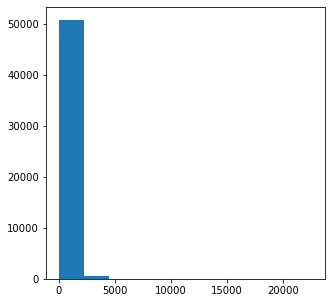

In [5]:
# Histogram for sales column data - Not a Normal Distribution
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(5,5))
pyplot.hist(data['Sales'])
pyplot.show()

# Hypothesis Statement - 2 --> Correlation Test - Pearson correlation

In [6]:
# H0: the two samples sales and profit are independent.
# H1: there is a dependency between the samples.

firstsample = data['Sales']
secondsample = data['Profit']
from scipy.stats import pearsonr
stat, p = pearsonr(firstsample,secondsample)
corr, _ = pearsonr(firstsample, secondsample) 
print('stat=%.3f, p=%5f' % (stat, p))
print('Pearsons correlation: %.3f' % corr)
if p > 0.05:
    print('Independent samples-Fail to Reject H0')
else:
    print('Dependent samples-Reject H0')

stat=0.485, p=0.000000
Pearsons correlation: 0.485
Dependent samples-Reject H0


In [7]:
import scipy.stats
print("pearson correlation coefficient = ", scipy.stats.pearsonr(data['Sales'], data['Profit'])[0])
print("Spearman correlation coefficient = ", scipy.stats.spearmanr(data['Sales'], data['Profit'])[0]) 
print("Kendall Tau correlation coefficient = ", scipy.stats.kendalltau(data['Sales'], data['Profit'])[0])

pearson correlation coefficient =  0.4849181126194444
Spearman correlation coefficient =  0.4901910469388152
Kendall Tau correlation coefficient =  0.3894152204641049


In [8]:
data['Sales'].corr(data['Profit'])

0.4849181126194451

In [9]:
# Correlation on 2 columns using numpy
import numpy as np
np.corrcoef(data['Sales'],data['Profit'])

array([[1.        , 0.48491811],
       [0.48491811, 1.        ]])

In [10]:
# correlation on entire dataframe using pandas
data.corr(method = 'pearson')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.038431
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025491
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.767835
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.271804
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.078153
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354423
Shipping Cost,-0.038431,-0.025491,0.767835,0.271804,-0.078153,0.354423,1.000000


<AxesSubplot:>

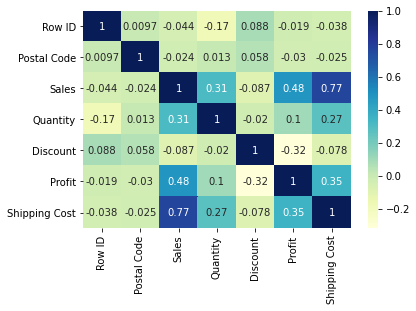

In [11]:
import seaborn as sns
sns.heatmap(data.corr(method = 'pearson'),cmap='YlGnBu',annot=True)

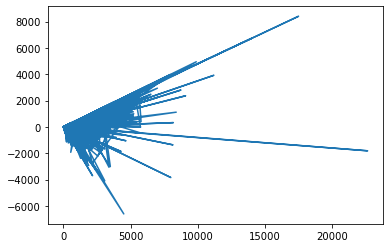

In [12]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.plot(firstsample,secondsample)
pyplot.show()

Text(0.5, 1.015, 'sales vs profit')

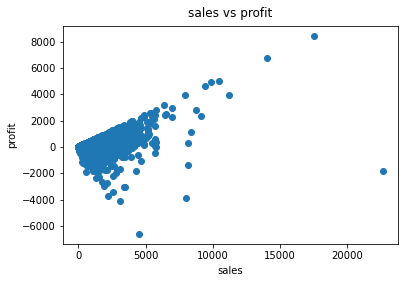

In [13]:
# Scatter plot of sales and profit correlation 
import matplotlib.pyplot as plt
plt.scatter(x=data['Sales'], y=data['Profit'])
plt.xlabel("sales", labelpad=5)
plt.ylabel("profit", labelpad=5)
plt.title("sales vs profit", y=1.015)

# Hypothesis Statement - 3 --> Parametric test - ANOVA Test 

In [15]:
# Analysis of variance test
# Tests whether the means of two or more independent samples are significantly different.
# H0: the means of the samples are equal.
# H1: one or more of the means of the samples are unequal.

from scipy.stats import f_oneway
data1 = data['Sales']
data2 = data['Profit']
data3 = data['Shipping Cost']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=9060.227, p=0.000
Probably different distributions


# Hypothesis Statement - 4 --> Non Parametric test - FriedMan test

In [17]:
# Tests whether the distributions of two or more paired samples are equal or not.
# H0: the distributions of all samples are equal.
# H1: the distributions of one or more samples are not equal.

from scipy.stats import friedmanchisquare
data1 = data['Quantity']
data2 = data['Discount']
data3 = data['Sales']
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=102340.534, p=0.000
Probably different distributions


# Hypothesis Statement - 5 --> D’Agostino’s K^2 Test

In [18]:
# H0: the sample has a Gaussian distribution.
# H1: the sample does not have a Gaussian distribution.

from scipy.stats import normaltest
stat, p = normaltest(data['Profit'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=54793.944, p=0.000
Probably not Gaussian


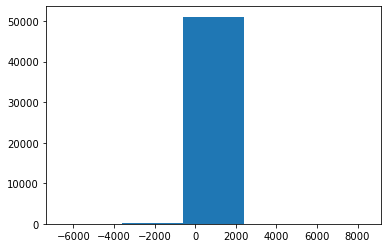

In [30]:
# Histogram on profit column data
import matplotlib.pyplot as plt
plt.hist(data['Profit'], bins = 5)
plt.show()

<AxesSubplot:>

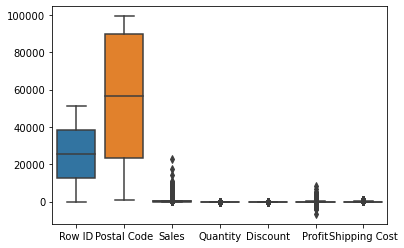

In [33]:
# Box plot of Global stores dataset
import seaborn as sns
sns.boxplot(data = data, orient = 'v')

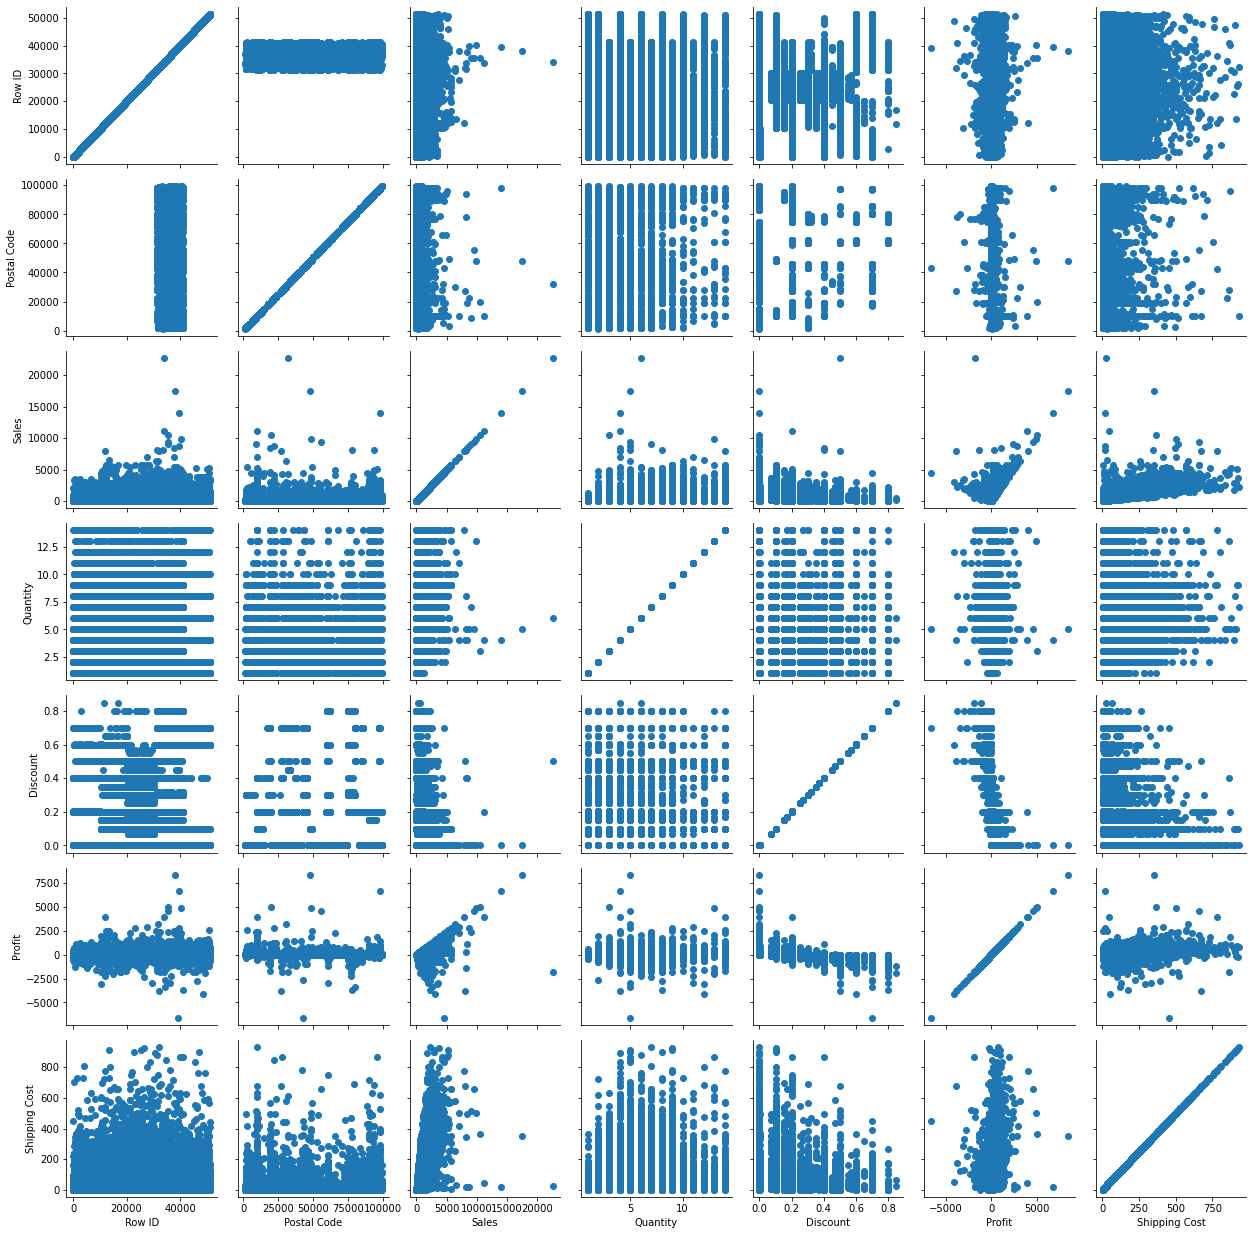

In [34]:
# Scatter plot of Global stores dataset
import matplotlib.pyplot as plt
import seaborn as sns
grids = sns.PairGrid(data)
grids.map(plt.scatter)